In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

***Chargement des données***

In [24]:
train_data = pd.read_csv('fashion-mnist_train.csv')
test_data = pd.read_csv('fashion-mnist_test.csv')

**# Exploration des données**

In [25]:
print("Shape des données d'entraînement:", train_data.shape)
print("Shape des données de test:", test_data.shape)
print("Info des données d'entraînement:")
train_data.info()
print("Aperçu des données:")
train_data.head(5)

Shape des données d'entraînement: (60000, 785)
Shape des données de test: (10000, 785)
Info des données d'entraînement:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB
Aperçu des données:


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **Vérification des valeurs manquantes**

In [26]:
print("Valeurs manquantes avant traitement:")
print(train_data.isnull().sum())

Valeurs manquantes avant traitement:
label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64


**Remplacement des valeurs manquantes par la médiane**

In [27]:
train_data.fillna(train_data.median(), inplace=True)
test_data.fillna(test_data.median(), inplace=True)

**Vérification après traitement**

In [28]:
print("Valeurs manquantes après traitement:")
print(train_data.isnull().sum())

Valeurs manquantes après traitement:
label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64


**Matrice de corrélation**

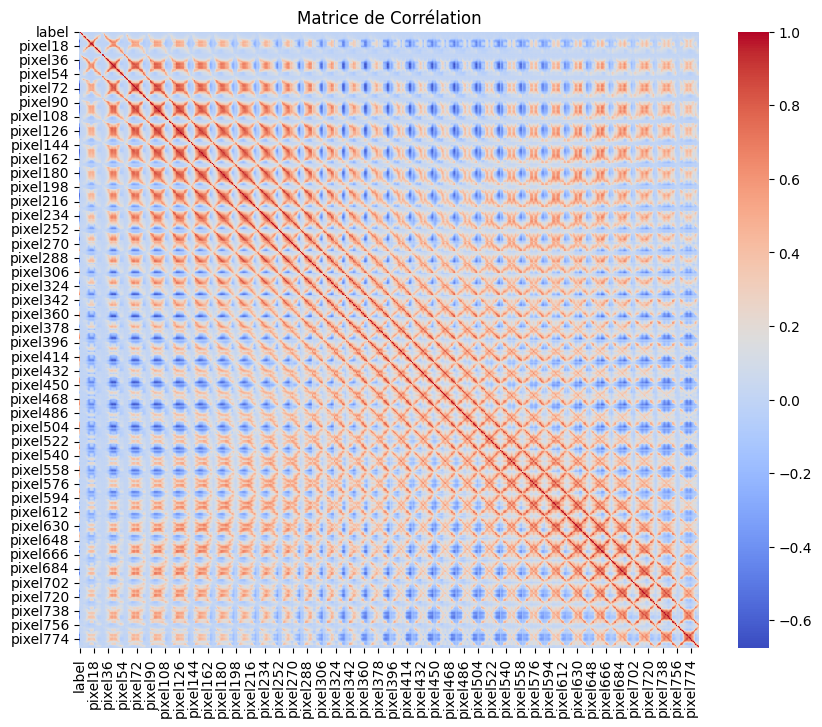

In [29]:
plt.figure(figsize=(10, 8))
sns.heatmap(train_data.corr(), cmap='coolwarm', annot=False)
plt.title("Matrice de Corrélation")
plt.show()

**Visualisation de quelques images**

Visualisation de quelques images...


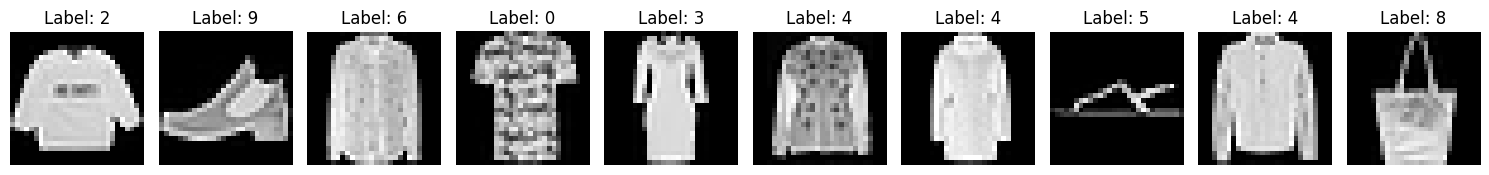

In [30]:
print("Visualisation de quelques images...")
def plot_images(data, labels, num_images=10):
    plt.figure(figsize=(15, 3))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        img = data.iloc[i].values.reshape(28, 28)
        plt.imshow(img, cmap='gray')
        plt.title(f"Label: {labels.iloc[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_images(train_data.drop('label', axis=1), train_data['label'])

**Séparation des features et labels**

In [31]:
labels = train_data['label']
features = train_data.drop('label', axis=1) / 255.0  # Normalisation

test_labels = test_data['label']
test_features = test_data.drop('label', axis=1) / 255.0

**Reshape des images**

In [32]:
features = features.values.reshape(-1, 28, 28, 1)
test_features = test_features.values.reshape(-1, 28, 28, 1)

**One-hot encoding des labels**

In [33]:
labels = to_categorical(labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

In [34]:
X_train, X_val, y_train, y_val = train_test_split(features, labels, test_size=0.2, random_state=42)

**# Définition du modèle CNN**

In [35]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Compilation du modèle**

In [36]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

**Entraînement avec augmentation de données**

**Entraînement avec augmentation de données**

In [37]:
datagen = ImageDataGenerator(rotation_range=10, zoom_range=0.1, width_shift_range=0.1, height_shift_range=0.1)

history = model.fit(datagen.flow(X_train, y_train, batch_size=64),
                    validation_data=(X_val, y_val),
                    epochs=10, verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 60s 77ms/step - accuracy: 0.6027 - loss: 1.0854 - val_accuracy: 0.7889 - val_loss: 0.5285
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 59s 79ms/step - accuracy: 0.7580 - loss: 0.6413 - val_accuracy: 0.8276 - val_loss: 0.4469
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 78ms/step - accuracy: 0.7829 - loss: 0.5817 - val_accuracy: 0.8435 - val_loss: 0.4119
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 60s 79ms/step - accuracy: 0.8014 - loss: 0.5336 - val_accuracy: 0.8533 - val_loss: 0.3864
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 59s 79ms/step - accuracy: 0.8155 - loss: 0.4980 - val_accuracy: 0.8517 - val_loss: 0.3779
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 60s 79ms/step - accuracy: 0.8211 - loss: 0.4763 - val_accuracy: 0.8700 - val_loss: 0.3368
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 57s 77ms/step - accuracy: 0.8359 - loss: 0.4487 - val_accuracy: 0.8727 - val_loss: 0.3271
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 84s 79ms/step - accuracy: 0.8380 - loss: 0.4348 - 

**Évaluation sur les données de test**

In [39]:
test_loss, test_acc = model.evaluate(test_features, test_labels)
print("Accuracy sur les données de test:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8859 - loss: 0.3036
Accuracy sur les données de test: 0.8896999955177307


**Matrice de confusion**

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


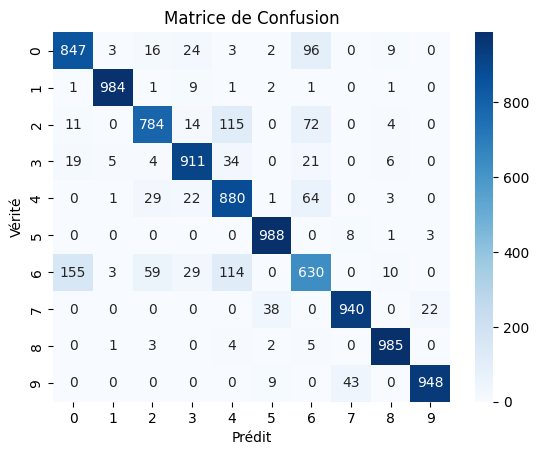

In [40]:
y_pred = np.argmax(model.predict(test_features), axis=1)
y_true = np.argmax(test_labels, axis=1)
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Prédit")
plt.ylabel("Vérité")
plt.title("Matrice de Confusion")
plt.show()

**# Rapport de classification**

In [41]:
print("Rapport de classification:")
print(classification_report(y_true, y_pred))

Rapport de classification:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83      1000
           1       0.99      0.98      0.99      1000
           2       0.88      0.78      0.83      1000
           3       0.90      0.91      0.91      1000
           4       0.76      0.88      0.82      1000
           5       0.95      0.99      0.97      1000
           6       0.71      0.63      0.67      1000
           7       0.95      0.94      0.94      1000
           8       0.97      0.98      0.98      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



**Visualisation des erreurs de classification**

Visualisation des images mal classées...


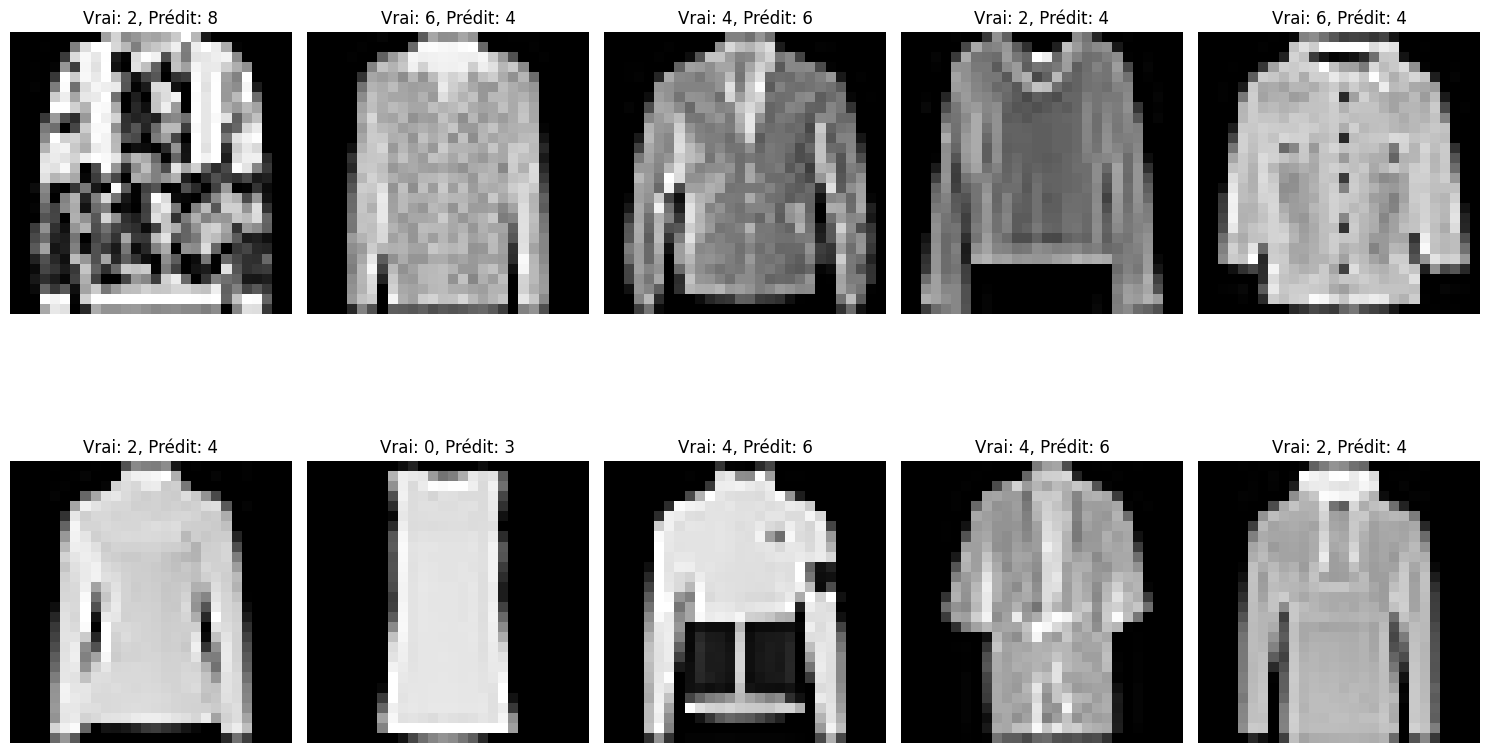

In [43]:
print("Visualisation des images mal classées...")
misclassified_idx = np.where(y_pred != y_true)[0]

plt.figure(figsize=(15, 10))
for i, idx in enumerate(misclassified_idx[:10]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_features[idx].reshape(28, 28), cmap='gray')
    plt.title(f"Vrai: {y_true[idx]}, Prédit: {y_pred[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

**Visualisation des images correctement classées**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Visualisation des images correctement classées...


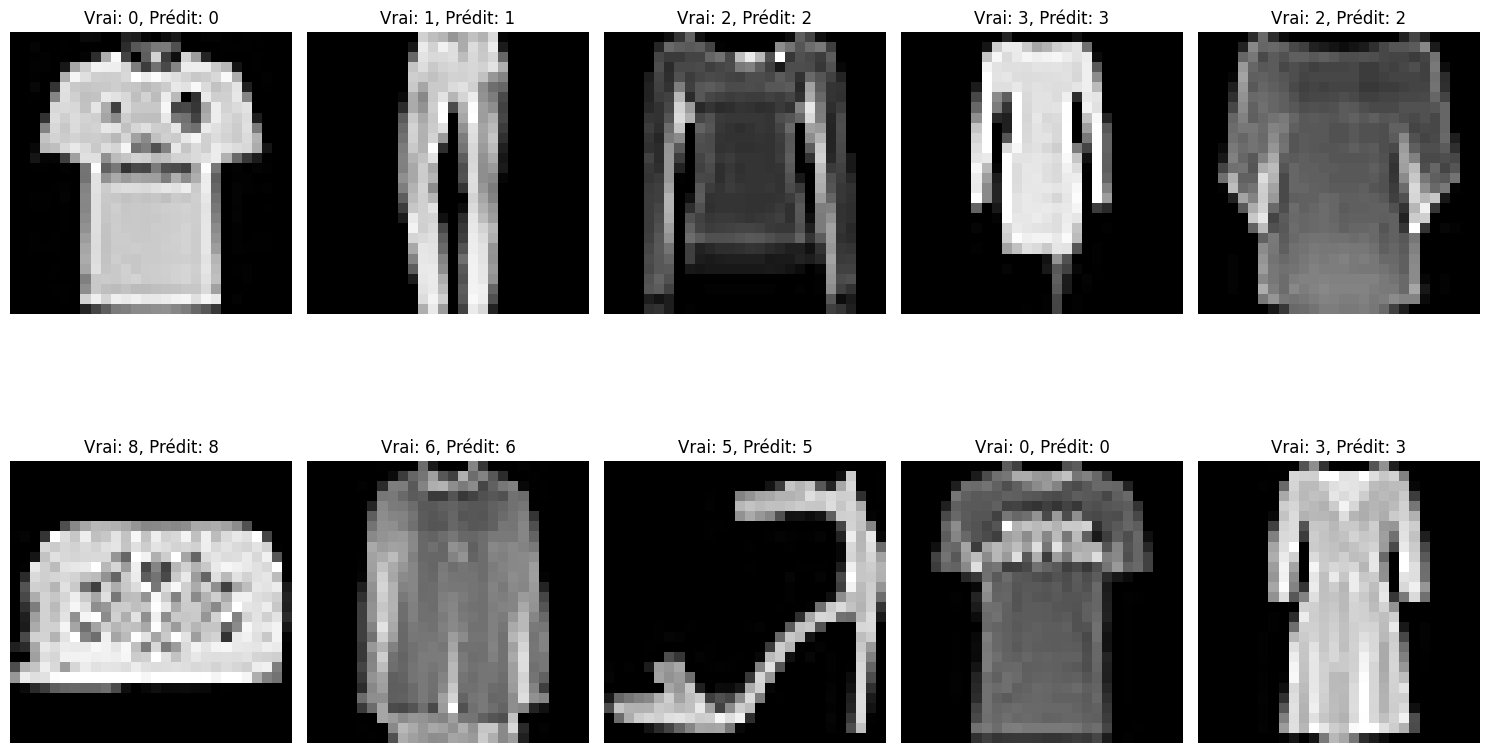

In [44]:
print("Visualisation des images correctement classées...")
correctly_classified_idx = np.where(y_pred == y_true)[0]

plt.figure(figsize=(15, 10))
for i, idx in enumerate(correctly_classified_idx[:10]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_features[idx].reshape(28, 28), cmap='gray')
    plt.title(f"Vrai: {y_true[idx]}, Prédit: {y_pred[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
